In [1]:
import seaborn as sb
import pandas as pd
from matplotlib import pyplot as plt

In [9]:
df = pd.read_csv('samengoed.csv', sep=',', low_memory=False)

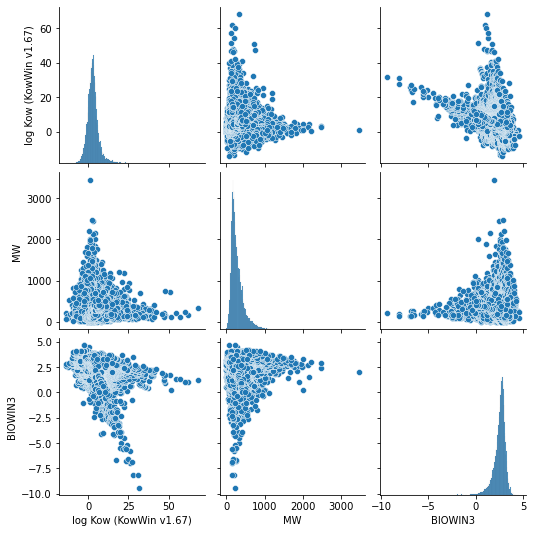

In [10]:
sb.pairplot(df, vars=['log Kow (KowWin v1.67)','MW','BIOWIN3',])

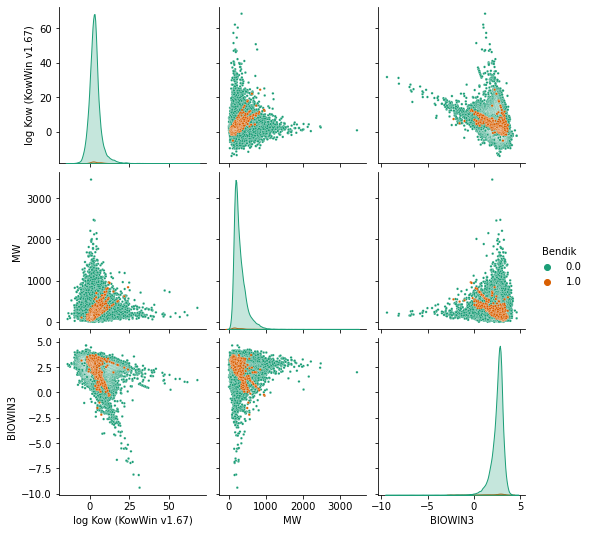

In [17]:
sb.pairplot(df, vars=['log Kow (KowWin v1.67)','MW','BIOWIN3',], hue='Bendik', palette='Dark2', plot_kws={"s": 6})

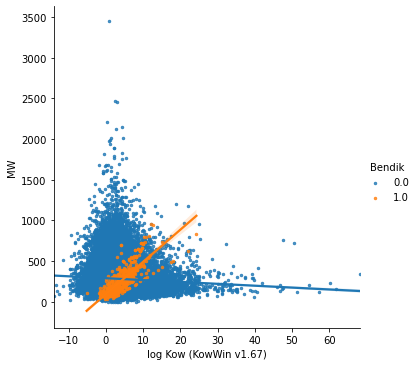

In [16]:
sb.lmplot(x='log Kow (KowWin v1.67)', y='MW', hue = 'Bendik',scatter_kws={"s": 6}, data=df)

In [ ]:
sb.pairplot(df, vars=['log Kow (KowWin v1.67)','MW','BIOWIN3',], hue='Bendik', palette='Dark2', plot_kws={"s": 6})